In [1]:
import os
import platform
import psutil
import torch
import logging

# Configuração do logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def get_system_info():
    """Obtém informações sobre o sistema e as bibliotecas relevantes."""
    system_info = {}
    try:
        system_info["Sistema Operacional"] = f"{platform.system()} {platform.release()}"
        system_info["Processador"] = platform.processor()
        system_info["Memória RAM Total"] = f"{psutil.virtual_memory().total / (1024**3):.2f} GB"

        if torch.cuda.is_available():
            system_info["CUDA Disponível"] = "Sim"
            system_info["Número de GPUs"] = torch.cuda.device_count()
            for i in range(torch.cuda.device_count()):
                system_info[f"GPU {i}"] = torch.cuda.get_device_name(i)
        else:
            system_info["CUDA Disponível"] = "Não"

    except Exception as e:
        logging.error(f"Erro ao obter informações do sistema: {e}")

    return system_info

def check_library(lib_name):
    """Verifica se uma biblioteca está instalada e funcionando corretamente."""
    try:
        # Tentar importar a biblioteca
        __import__(lib_name)
        return True
    except ImportError:
        logging.error(f"A biblioteca '{lib_name}' não está instalada.")
        return False
    except Exception as e:
        logging.error(f"Erro ao verificar a biblioteca '{lib_name}': {e}")
        return False

def check_cuda_path():
    """Verifica se a variável de ambiente CUDA_PATH está definida corretamente."""
    cuda_path = os.environ.get('CUDA_PATH')
    if cuda_path is None or not os.path.exists(cuda_path):
        logging.error("A variável de ambiente CUDA_PATH não está definida ou o caminho é inválido.")
        return False
    else:
        logging.info(f"CUDA_PATH: {cuda_path}")
        return True

In [2]:
!pip show torch

Name: torch
Version: 2.2.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\Users\marco\anaconda3\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: openai-whisper, sentence-transformers


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:30:42_Pacific_Standard_Time_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0


In [4]:
import torch
torch.cuda.is_available()

True

In [5]:
check_cuda_path()

2024-06-29 14:44:31,154 - INFO - CUDA_PATH: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.3


True

In [10]:
# Obter informações do sistema
system_info = get_system_info()
for key, value in system_info.items():
    print(f"{key}: {value}")

# Verificar CUDA_PATH (se necessário)
if system_info.get("CUDA Disponível") == "Sim":
    check_cuda_path()
# Verificar bibliotecas
if not check_library('networkx'):
    print("Instale a biblioteca NetworkX: pip install networkx")
if not check_library('hypernetx'):
    print("Instale a biblioteca HypernetX: pip install hypernetx")    
if not check_library('numpy'):
    print("Instale a biblioteca NumPy: pip install numpy")
if not check_library('numba'):
    print("Instale a biblioteca Numba: pip install numba")    
if not check_library('cupy'):
    print("Instale a biblioteca CuPy: pip install cupy")    
# ... (verificar outras bibliotecas)



2024-06-29 14:46:50,525 - INFO - CUDA_PATH: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.3


Sistema Operacional: Windows 10
Processador: AMD64 Family 25 Model 33 Stepping 0, AuthenticAMD
Memória RAM Total: 63.94 GB
CUDA Disponível: Sim
Número de GPUs: 1
GPU 0: NVIDIA GeForce RTX 2060


2024-06-29 14:46:50,890 - ERROR - A biblioteca 'cupy' não está instalada.


Instale a biblioteca CuPy: pip install cupy


In [14]:
# !pip install hypernetx
# !pip show hypernetx

# !pip install numba
# !pip show numba

Cria lista de nós: Cria uma lista nodes contendo os identificadores dos nós (de 0 a 99).

Cria lista de hiperarestas: Cria uma lista vazia hyperedges para armazenar as hiperarestas. Em seguida, um loop for cria num_edges hiperarestas aleatórias.

edge_size é um número aleatório entre 2 e num_nodes // 2, garantindo que cada hiperaresta tenha pelo menos 2 nós e no máximo metade dos nós do grafo.

hyperedge é um array NumPy com edge_size nós escolhidos aleatoriamente (sem repetição) da lista de nós nodes.

hyperedges.append(hyperedge) adiciona a nova hiperaresta à lista hyperedges.

Cria o hipergrafo: H = hnx.Hypergraph(hyperedges) cria o hipergrafo a partir da lista de hiperarestas hyperedges.
Visualiza o hipergrafo (opcional): hnx.draw(H) plota o hipergrafo gerado.

Converte para NetworkX: G_nx = H.bipartite() converte o hipergrafo em um grafo bipartido do NetworkX, onde um conjunto de nós representa os nós originais e o outro conjunto representa as hiperarestas.

Salva o grafo bipartido: nx.write_edgelist(G_nx, "dados_hipergrafo.txt", delimiter="\t", data=False) salva o grafo bipartido em um arquivo de texto chamado "dados_hipergrafo.txt". Cada linha do arquivo representa uma aresta entre um nó e uma hiperaresta, separados por uma tabulação (\t). O argumento data=False indica que apenas os índices dos nós e hiperarestas devem ser salvos, sem atributos adicionais.

# Hipergrafos

Um hipergrafo é uma generalização de um grafo, em que as arestas, chamadas de hiperarestas, podem conectar qualquer número de vértices (nós). Em um grafo normal, cada aresta conecta exatamente dois vértices.

Na imagem, os números podem ser interpretados como vértices (nós) e as curvas fechadas multicoloridas como hiperarestas. Cada hiperaresta engloba os vértices que ela conecta. Por exemplo, a hiperaresta vermelha conecta os vértices 12, 14, 15, 18, 21, 27, 28, 40, 42, 45 e 47.

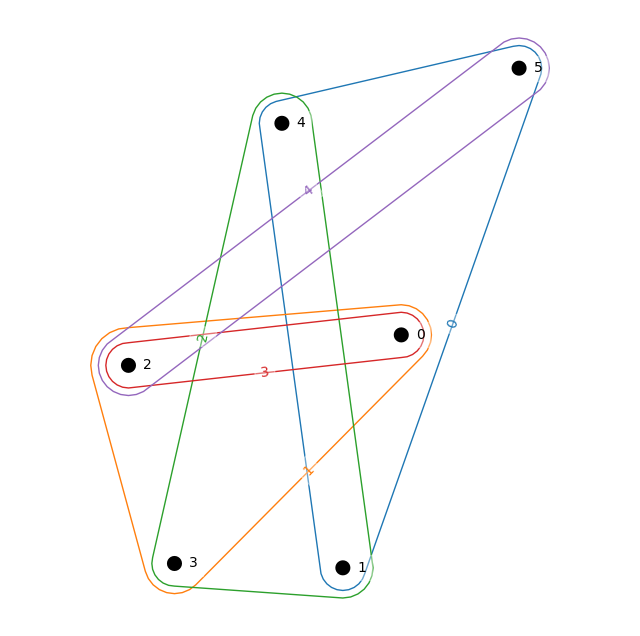

In [16]:
import hypernetx as hnx
import networkx as nx
import numpy as np

# Parâmetros do hipergrafo
num_nodes = 6
num_edges = 5

# Criar lista de nós
nodes = list(range(num_nodes))

# Criar lista de hiperarestas aleatórias
hyperedges = []
for _ in range(num_edges):
    # Escolhe um número aleatório de nós para cada hiperaresta
    edge_size = np.random.randint(2, num_nodes // 2 + 1)  # Garante que as hiperarestas tenham pelo menos 2 nós
    hyperedge = np.random.choice(nodes, edge_size, replace=False)  # Escolhe os nós aleatoriamente
    hyperedges.append(hyperedge)

# Criar o hipergrafo a partir das listas de nós e hiperarestas
H = hnx.Hypergraph(hyperedges)

# Visualizar o hipergrafo (opcional)
hnx.draw(H)

# Converter para o formato bipartido do NetworkX
G_nx = H.bipartite()

# Salvar o grafo bipartido em um arquivo
nx.write_edgelist(G_nx, "dados_hipergrafo.txt", delimiter="\t", data=False)

Quanto a interpretação de hipergrafos, ela depende do contexto do problema aqui estão algumas possibilidades:

    Redes sociais: Os vértices podem representar pessoas e as hiperarestas podem representar grupos sociais, eventos ou interesses compartilhados.
    
    Coautoria científica: Os vértices podem representar autores e as hiperarestas podem representar artigos científicos em que colaboraram.

    Sistemas de recomendação: Os vértices podem representar usuários e itens, e as hiperarestas podem representar conjuntos de itens recomendados para um usuário ou conjuntos de usuários que receberam a mesma recomendação.

    Dados biológicos: Os vértices podem representar genes ou proteínas, e as hiperarestas podem representar vias biológicas ou complexos moleculares.

    A imagem mostra um hipergrafo com uma estrutura complexa, com muitas hiperarestas sobrepostas. Isso sugere que as relações entre os vértices são complexas e multifacetadas, o que é típico de muitos sistemas do mundo real.

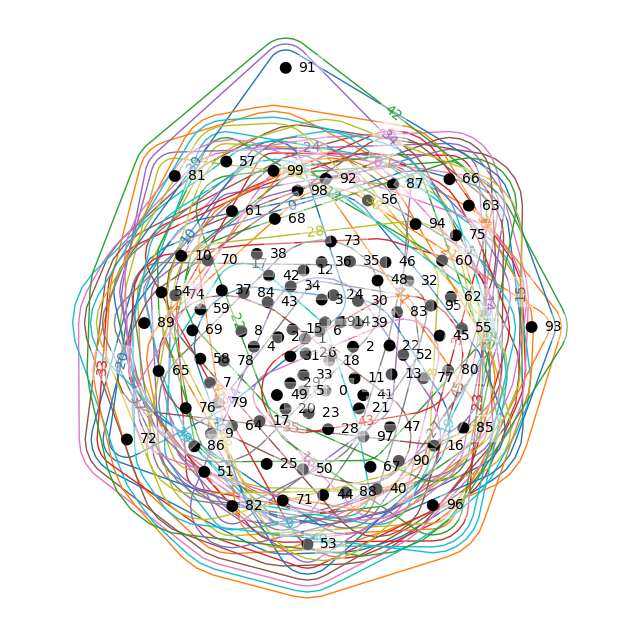

In [17]:
import hypernetx as hnx
import networkx as nx
import numpy as np

# Parâmetros do hipergrafo
num_nodes = 100
num_edges = 50

# Criar lista de nós
nodes = list(range(num_nodes))

# Criar lista de hiperarestas aleatórias
hyperedges = []
for _ in range(num_edges):
    # Escolhe um número aleatório de nós para cada hiperaresta
    edge_size = np.random.randint(2, num_nodes // 2 + 1)  # Garante que as hiperarestas tenham pelo menos 2 nós
    hyperedge = np.random.choice(nodes, edge_size, replace=False)  # Escolhe os nós aleatoriamente
    hyperedges.append(hyperedge)

# Criar o hipergrafo a partir das listas de nós e hiperarestas
H = hnx.Hypergraph(hyperedges)

# Visualizar o hipergrafo (opcional)
hnx.draw(H)

# Converter para o formato bipartido do NetworkX
G_nx = H.bipartite()

# Salvar o grafo bipartido em um arquivo
nx.write_edgelist(G_nx, "dados_hipergrafo.txt", delimiter="\t", data=False)


Nome do Módulo: 
O nome do arquivo Python que contém a classe OverlappingCommunityDetector é community_detection.py. 
Portanto, para importar a classe, devemos usar from community_detection import OverlappingCommunityDetector.

Para utilizar OverlappingCommunityDetector é necessário também instalar o CuPy

In [ ]:
from graph_bench_module import OverlappingCommunityDetector
import hypernetx as hnx
import networkx as nx
import numpy as np

# Parâmetros do hipergrafo
num_nodes = 6
num_edges = 5

# Criar lista de nós
nodes = list(range(num_nodes))

# Criar lista de hiperarestas aleatórias
hyperedges = []
for _ in range(num_edges):
    # Escolhe um número aleatório de nós para cada hiperaresta
    edge_size = np.random.randint(2, num_nodes // 2 + 1)  # Garante que as hiperarestas tenham pelo menos 2 nós
    hyperedge = np.random.choice(nodes, edge_size, replace=False)  # Escolhe os nós aleatoriamente
    hyperedges.append(hyperedge)

# Criar o hipergrafo a partir das listas de nós e hiperarestas
H = hnx.Hypergraph(hyperedges)

# Visualizar o hipergrafo (opcional)
hnx.draw(H)

# Converter para o formato bipartido do NetworkX
G_nx = H.bipartite()

# Salvar o grafo bipartido em um arquivo
nx.write_edgelist(G_nx, "dados_hipergrafo.txt", delimiter="\t", data=False)

# Restrições de pares (exemplo)
must_link = [(1, 2), (3, 4)]
cannot_link = [(1, 3), (2, 4)]

# Parâmetros do algoritmo (ajuste conforme necessário)
num_communities = 5
other_params = {
    'resolution': 1.0,
    'must_link_weight': 1.0,
    'cannot_link_weight': 1.0
}

detector = OverlappingCommunityDetector(H, must_link, cannot_link, num_communities, other_params)

if detector._check_libraries():
    # Realizar benchmarking e detecção de comunidades
    communities = detector.detect_communities_benchmarking()
else:
    print("Instale as bibliotecas ausentes antes de executar o algoritmo.")

ModuleNotFoundError: No module named 'cupy'

In [ ]:
# !pip install cupy
# !pip show cupy

# import cupy as cp
# print(cp.cuda.runtime.getDeviceCount())

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from graph_bench_module import OverlappingCommunityDetector
import platform
import psutil

# Carregar o hipergrafo (substituir pelo seu arquivo)
G_nx = nx.read_edgelist("dados_hipergrafo.txt", delimiter="\t", create_using=nx.Graph())
H = hnx.Hypergraph(G_nx)

# Restrições de pares (exemplo)
must_link = [(1, 2), (3, 4)]
cannot_link = [(1, 3), (2, 4)]

# Parâmetros do algoritmo (ajuste conforme necessário)
num_communities = 5
other_params = {
    'resolution': 1.0,
    'must_link_weight': 1.0,
    'cannot_link_weight': 1.0
}

# Criar o detector de comunidades
detector = OverlappingCommunityDetector(H, must_link, cannot_link, num_communities, other_params)

# Informações sobre o ambiente de execução
print("Informações do sistema:")
print(f"  - Sistema operacional: {platform.system()} {platform.release()}")
print(f"  - Processador: {platform.processor()}")
print(f"  - Memória RAM total: {psutil.virtual_memory().total / (1024**3):.2f} GB")
print(f"  - Número de GPUs disponíveis: {torch.cuda.device_count() if torch.cuda.is_available() else 0}")

# Benchmarking
cpu_time = detector._benchmark_cpu()
gpu_time = detector._benchmark_gpu() if detector._has_gpu() else float('inf')

print("\nResultados do Benchmarking:")
print(f"  - Tempo de execução na CPU: {cpu_time:.2f} segundos")
print(f"  - Tempo de execução na GPU: {gpu_time:.2f} segundos")

# Detectar comunidades (escolhendo CPU ou GPU automaticamente)
communities = detector.detect_communities_benchmarking()

# Imprimir as comunidades encontradas
print(communities)


ModuleNotFoundError: No module named 'cupy'

In [ ]:
# Detectar comunidades com benchmarking
communities = detector.detect_communities_benchmarking()

# Imprimir as comunidades encontradas
print(communities)

AttributeError: 'Hypergraph' object has no attribute 'is_directed'

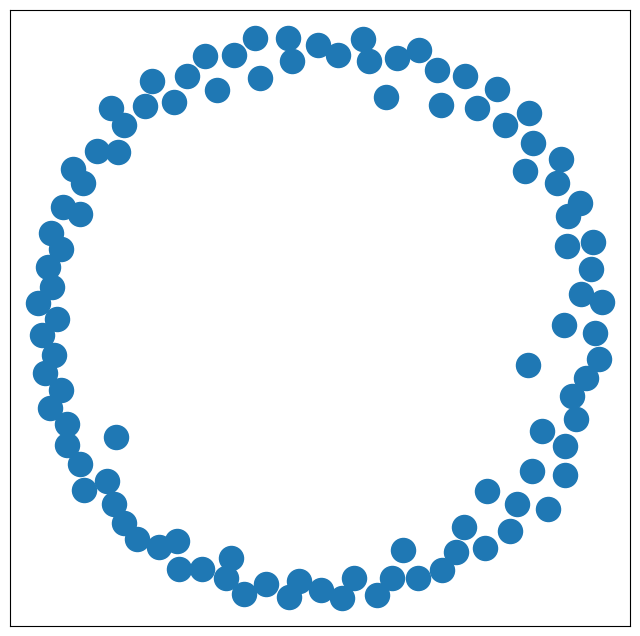

In [19]:
# Visualizar as comunidades
pos = nx.spring_layout(H)  # Layout para visualização
colors = ['r', 'g', 'b', 'y', 'c']  # Cores para as comunidades

# Desenhar o hipergrafo
nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_edges(H, pos, alpha=0.5)

# Desenhar os nós com cores diferentes para cada comunidade
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(H, pos, nodelist=community, node_color=colors[i % len(colors)])

plt.show()